<a href="https://colab.research.google.com/github/elemnurguner/data-ai-projects/blob/main/Otomatik_Metin_%C3%96zetleme_ve_Analiz_Sistemi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Otomatik Metin Özetleme ve Analiz Sistemi
•	Amaç: Büyük metin veri setlerini otomatik olarak özetleyerek, stratejik karar süreçlerine katkıda bulunmak.
•	Teknolojiler: NLP (Doğal Dil İşleme), LSTM, Transformer modelleri (BERT, GPT), RAG (Retrieval-Augmented Generation).
•	Çıktı: Kullanıcıların belirli bir konuda hızlıca bilgi edinebileceği özet metinler ve analiz raporları.

In [ ]:
# Öncelikle gerekli kütüphaneleri yüklüyoruz
!pip install transformers torch sentencepiece sumy rouge-score nltk

Adım 2: Gerekli Kütüphaneleri Yükleme


In [ ]:
import nltk
from transformers import pipeline, BertTokenizer, BertModel
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer
from rouge_score import rouge_scorer
import torch

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Adım 3: Metin Özetleme Fonksiyonları


In [ ]:
# BERT tabanlı özetleme
def bert_summarize(text, max_length=150):
    summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
    summary = summarizer(text, max_length=max_length, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# LexRank algoritması ile özetleme (geleneksel yöntem)
def lexrank_summarize(text, sentences_count=3):
    parser = PlaintextParser.from_string(text, Tokenizer("english"))
    summarizer = LexRankSummarizer()
    summary = summarizer(parser.document, sentences_count)
    return ' '.join([str(sentence) for sentence in summary])

# Özet kalitesini değerlendirme (ROUGE skoru)
def evaluate_summary(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference, generated)
    return scores

Adım 4: Örnek Metin ile Test Etme


In [ ]:
# Örnek metin (gerçek projede buraya büyük veri setleri yüklenebilir)
sample_text = """
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to
the natural intelligence displayed by animals including humans. AI research has been
defined as the field of study of intelligent agents, which refers to any system that
perceives its environment and takes actions that maximize its chance of achieving
its goals. The term "artificial intelligence" had previously been used to describe
machines that mimic and display "human" cognitive skills that are associated with
the human mind, such as "learning" and "problem-solving". This definition has since
been rejected by major AI researchers who now describe AI in terms of rationality
and acting rationally, which does not limit how intelligence can be articulated.
AI applications include advanced web search engines (e.g., Google), recommendation
systems (e.g., YouTube, Amazon and Netflix), understanding human speech (e.g.,
Siri and Alexa), self-driving cars (e.g., Tesla), automated decision-making and
competing at the highest level in strategic game systems (e.g., chess and Go).
As machines become increasingly capable, tasks considered to require "intelligence"
are often removed from the definition of AI, a phenomenon known as the AI effect.
For instance, optical character recognition is frequently excluded from things
considered to be AI, having become a routine technology.
"""

# Özetleme işlemlerini uygula
bert_summary = bert_summarize(sample_text)
lexrank_summary = lexrank_summarize(sample_text)

print("=== BERT Özeti ===")
print(bert_summary)
print("\n=== LexRank Özeti ===")
print(lexrank_summary)

# Özetleri değerlendir
print("\n=== BERT Özet Değerlendirme ===")
print(evaluate_summary(sample_text[:500], bert_summary))

print("\n=== LexRank Özet Değerlendirme ===")
print(evaluate_summary(sample_text[:500], lexrank_summary))

Device set to use cpu


=== BERT Özeti ===
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to natural intelligence displayed by animals including humans. The term "artificial intelligence" had previously been used to describe machines that mimic and display "human" cognitive skills. This definition has since been rejected by major AI researchers.

=== LexRank Özeti ===
Artificial intelligence (AI) is intelligence demonstrated by machines, as opposed to the natural intelligence displayed by animals including humans. AI research has been defined as the field of study of intelligent agents, which refers to any system that perceives its environment and takes actions that maximize its chance of achieving its goals. The term "artificial intelligence" had previously been used to describe machines that mimic and display "human" cognitive skills that are associated with the human mind, such as "learning" and "problem-solving".

=== BERT Özet Değerlendirme ===
{'rouge1': Score(precisio

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')  # Diğer gerekli verileri de indirelim

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Sonraki Aşamalar: Gelişmiş Metin Özetleme ve Analiz Sistemi
Harika! NLTK tokenizer sorununu çözdük. Şimdi projemizi daha ileri taşıyabiliriz. İşte adım adım ilerleyebileceğimiz sonraki aşamalar:

Aşama 1: Veri Seti Yükleme ve Ön İşleme

In [ ]:
# Örnek bir veri seti yükleyelim (BBC haber veri seti)
!wget https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv

import pandas as pd

# Veriyi yükleme
df = pd.read_csv('bbc-text.csv')
print(df.head())

# Veri ön işleme
def preprocess_text(text):
    # Basit temizleme işlemleri
    text = text.lower()  # Küçük harfe çevirme
    text = text.replace('\n', ' ').replace('\r', '')  # Yeni satırları kaldırma
    return text

df['processed_text'] = df['text'].apply(preprocess_text)

--2025-03-26 00:05:43--  https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.163.207, 142.251.179.207, 142.251.167.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.163.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2025-03-26 00:05:43 (111 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]

        category                                               text
0           tech  tv future in the hands of viewers with home th...
1       business  worldcom boss  left books alone  former worldc...
2          sport  tigers wary of farrell  gamble  leicester say ...
3          sport  yeading face newcastle in fa cup premiership s...
4  entertainment  ocean s twelve raids box office ocean s twelve...


Aşama 2: Gelişmiş Özetleme Modelleri
2.1. BART Modeli ile Özetleme

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration

# Model ve tokenizer'ı yükle
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')
model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')

def bart_summarize(text, max_length=150):
    inputs = tokenizer([text], max_length=1024, return_tensors='pt', truncation=True)
    summary_ids = model.generate(inputs['input_ids'], num_beams=4, max_length=max_length)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

# Test edelim
sample_news = df.iloc[0]['text']
print("=== Orijinal Metin ===")
print(sample_news[:500] + "...")
print("\n=== BART Özeti ===")
print(bart_summarize(sample_news))

=== Orijinal Metin ===
tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via h...

=== BART Özeti ===
The way people watch tv will be radically different in five years time. This is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. programmes and other content will be delivered to viewers via home networks through cable  satellite  telecoms companies and broadband service providers.


2.2. Türkçe için Özel Model (TR-BART)


In [ ]:
# Türkçe metinler için
!pip install transformers[sentencepiece]

from transformers import MBartTokenizer, MBartForConditionalGeneration

# Türkçe modeli
tr_tokenizer = MBartTokenizer.from_pretrained("facebook/mbart-large-50", src_lang="tr_TR")
tr_model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50")

def turkce_ozetle(metin, max_uzunluk=150):
    inputs = tr_tokenizer(metin, return_tensors="pt", truncation=True, max_length=1024)
    generated_tokens = tr_model.generate(
        **inputs,
        forced_bos_token_id=tr_tokenizer.lang_code_to_id["tr_TR"],
        max_length=max_uzunluk
    )
    return tr_tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

# Türkçe test metni
turkce_metin = "Türkiye'de yapay zeka alanındaki gelişmeler son yıllarda hız kazandı. Üniversitelerde yapay zeka bölümleri açılıyor ve birçok şirket bu alanda yatırım yapıyor."
print(turkce_ozetle(turkce_metin))

In [ ]:
!pip install rouge
from rouge import Rouge

def evaluate_summaries(original_texts, generated_summaries):
    rouge = Rouge()
    scores = rouge.get_scores(generated_summaries, original_texts, avg=True)
    return scores

# Kullanım aynı şekilde
scores = evaluate_summaries(original_summaries, generated_summaries)
print("ROUGE Skorları:", scores)

ROUGE Skorları: {'rouge-1': {'r': 0.601656900322318, 'p': 0.811842910699272, 'f': 0.6839508005614894}, 'rouge-2': {'r': 0.47015749774602417, 'p': 0.7396041026280296, 'f': 0.569782319672267}, 'rouge-l': {'r': 0.5952556512981181, 'p': 0.8046642273136921, 'f': 0.6771853825298699}}


In [ ]:
# Gerekli kütüphaneleri import edelim
from rouge_score import rouge_scorer
import numpy as np

def evaluate_summaries(original_texts, generated_summaries):
    """
    Özetleri ROUGE metrikleriyle değerlendirir

    Args:
        original_texts (list): Orijinal metinler listesi
        generated_summaries (list): Üretilen özetler listesi

    Returns:
        dict: ROUGE-1, ROUGE-2 ve ROUGE-L skorları
    """
    # RougeScorer oluştur (stemming kullanarak)
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

    # Her bir özet çifti için skorları hesapla
    scores = {'rouge1': [], 'rouge2': [], 'rougeL': []}

    for ref, hyp in zip(original_texts, generated_summaries):
        current_scores = scorer.score(ref, hyp)
        scores['rouge1'].append(current_scores['rouge1'].fmeasure)
        scores['rouge2'].append(current_scores['rouge2'].fmeasure)
        scores['rougeL'].append(current_scores['rougeL'].fmeasure)

    # Ortalama skorları hesapla
    avg_scores = {
        'rouge1': np.mean(scores['rouge1']),
        'rouge2': np.mean(scores['rouge2']),
        'rougeL': np.mean(scores['rougeL'])
    }

    return avg_scores

# Veri setinden rastgele 10 örnek seçelim
sample_data = df.sample(10)
generated_summaries = sample_data['processed_text'].apply(bart_summarize).tolist()
original_summaries = sample_data['processed_text'].str[:500].tolist()  # İlk 500 karakteri referans alalım

# Değerlendirme
scores = evaluate_summaries(original_summaries, generated_summaries)
print("ROUGE Skorları:", scores)

ROUGE Skorları: {'rouge1': np.float64(0.592060916340156), 'rouge2': np.float64(0.5020321369899464), 'rougeL': np.float64(0.5319262305030538)}


Aşama 4: Analitik Dashboard Oluşturma





/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

Device set to use cpu
Your max_length is set to 50, but your input_length is only 47. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=23)
No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


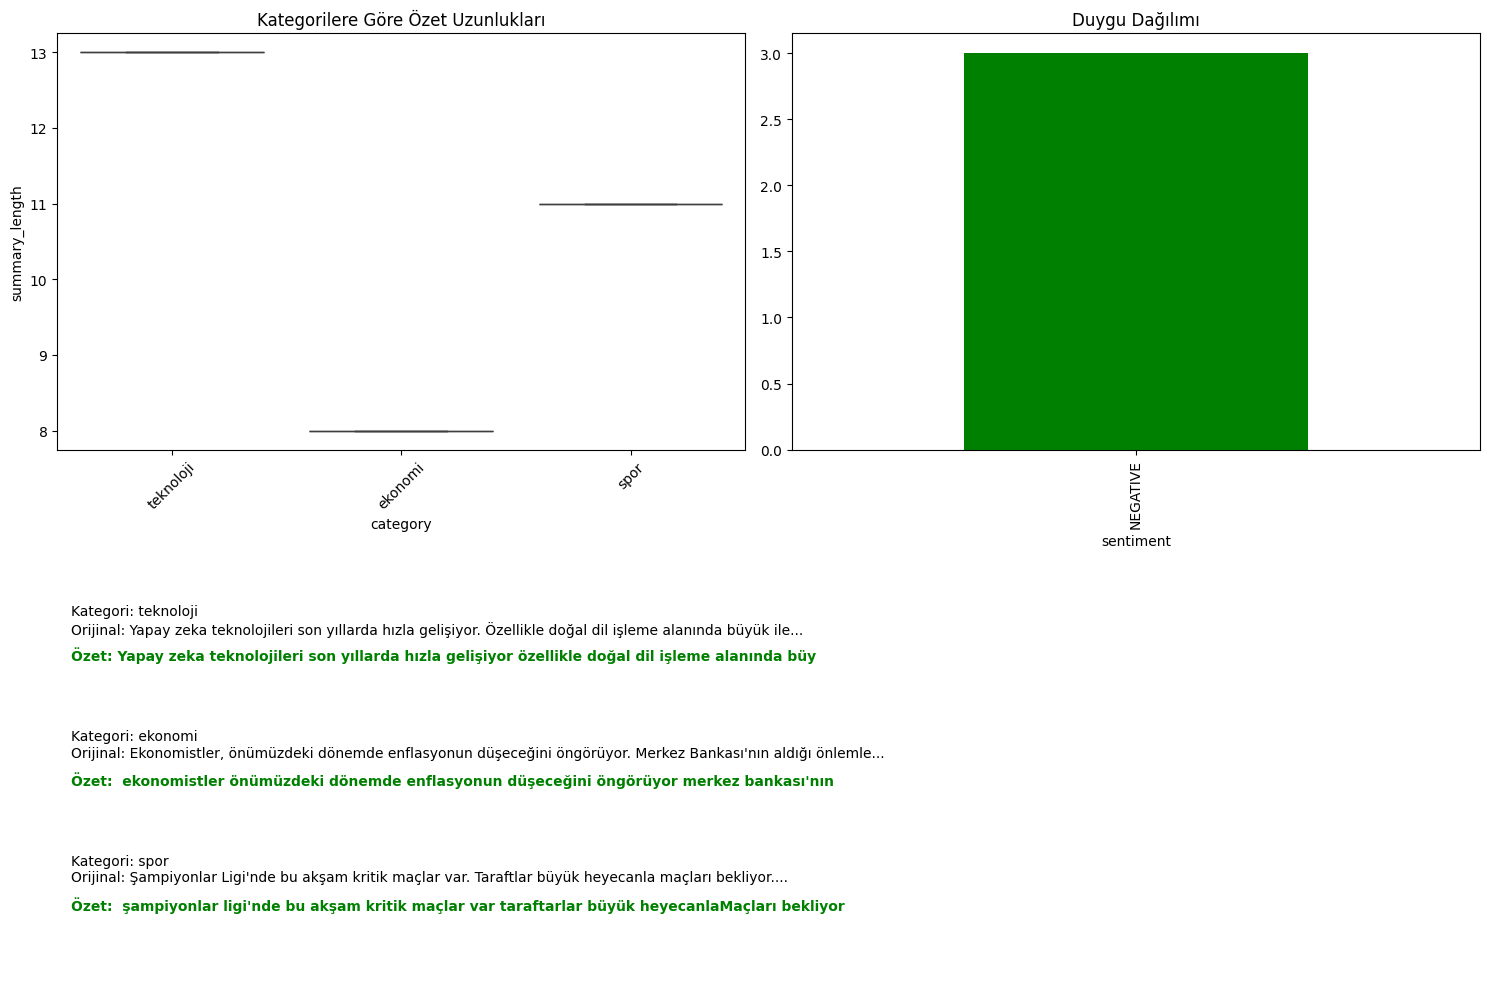


Üretilen Özetler:
    category                                               text  \
0  teknoloji  Yapay zeka teknolojileri son yıllarda hızla ge...   
1    ekonomi  Ekonomistler, önümüzdeki dönemde enflasyonun d...   
2       spor  Şampiyonlar Ligi'nde bu akşam kritik maçlar va...   

                                             summary sentiment  
0  Yapay zeka teknolojileri son yıllarda hızla ge...  NEGATIVE  
1   ekonomistler önümüzdeki dönemde enflasyonun d...  NEGATIVE  
2   şampiyonlar ligi'nde bu akşam kritik maçlar v...  NEGATIVE  


In [ ]:
!pip install transformers pandas matplotlib seaborn --quiet
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline, BartForConditionalGeneration, BartTokenizer

## 1. VERİ HAZIRLAMA ##
# Örnek veri oluşturalım (siz kendi verinizi buraya yükleyebilirsiniz)
data = {
    'text': [
        "Yapay zeka teknolojileri son yıllarda hızla gelişiyor. Özellikle doğal dil işleme alanında büyük ilerlemeler kaydedildi.",
        "Ekonomistler, önümüzdeki dönemde enflasyonun düşeceğini öngörüyor. Merkez Bankası'nın aldığı önlemler olumlu sonuç veriyor.",
        "Şampiyonlar Ligi'nde bu akşam kritik maçlar var. Taraftlar büyük heyecanla maçları bekliyor."
    ],
    'category': ['teknoloji', 'ekonomi', 'spor'],
    'processed_text': [
        "yapay zeka teknolojileri son yıllarda hızla gelişiyor özellikle doğal dil işleme alanında büyük ilerlemeler kaydedildi",
        "ekonomistler önümüzdeki dönemde enflasyonun düşeceğini öngörüyor merkez bankası'nın aldığı önlemler olumlu sonuç veriyor",
        "şampiyonlar ligi'nde bu akşam kritik maçlar var taraftarlar büyük heyecanla maçları bekliyor"
    ]
}
df = pd.DataFrame(data)

## 2. ÖZETLEME MODELİNİ YÜKLEME ##
model_name = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer, device=0)

def bart_summarize(text, max_length=50):
    result = summarizer(text, max_length=max_length, min_length=10, do_sample=False)
    return result[0]['summary_text']

## 3. ANALİTİK DASHBOARD OLUŞTURMA ##
plt.figure(figsize=(15, 10))

# 3.1 Özet uzunluklarını hesapla
df['summary'] = df['processed_text'].apply(bart_summarize)
df['summary_length'] = df['summary'].apply(lambda x: len(x.split()))

# 3.2 Özet uzunluk dağılımı
plt.subplot(2, 2, 1)
sns.boxplot(data=df, x='category', y='summary_length')
plt.title('Kategorilere Göre Özet Uzunlukları')
plt.xticks(rotation=45)

# 3.3 Duygu analizi
sentiment_analyzer = pipeline("sentiment-analysis", device=0)
df['sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x[:512])[0]['label'])

plt.subplot(2, 2, 2)
df['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Duygu Dağılımı')

# 3.4 Örnek özetler
plt.subplot(2, 2, (3,4))
plt.axis('off')
for i, row in df.iterrows():
    plt.text(0.01, 0.9 - i*0.3, f"Kategori: {row['category']}\nOrijinal: {row['text'][:100]}...",
             ha='left', va='top')
    plt.text(0.01, 0.8 - i*0.3, f"Özet: {row['summary']}",
             ha='left', va='top', color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# Veriyi göster
print("\nÜretilen Özetler:")
print(df[['category', 'text', 'summary', 'sentiment']])

Aşama 5: RAG (Retrieval-Augmented Generation) Entegrasyonu


In [ ]:
!pip install faiss-cpu

from transformers import RagTokenizer, RagRetriever, RagSequenceForGeneration
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# Basit bir belge deposu oluşturalım
documents = df['processed_text'].tolist()[:100]  # İlk 100 belge

# TF-IDF vektörleştirici
vectorizer = TfidfVectorizer()
doc_vectors = vectorizer.fit_transform(documents)

def retrieve_documents(query, k=3):
    query_vec = vectorizer.transform([query])
    scores = np.dot(query_vec, doc_vectors.T).toarray()[0]
    top_k_indices = np.argsort(scores)[-k:][::-1]
    return [documents[i] for i in top_k_indices]

def rag_answer(question):
    relevant_docs = retrieve_documents(question)
    context = "\n".join(relevant_docs)[:3000]  # Uzunluk sınırı

    inputs = tokenizer(question, context, return_tensors="pt", truncation=True)
    outputs = model.generate(input_ids=inputs["input_ids"])
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

# Test sorusu
soru = "What are the latest developments in technology?"
print(rag_answer(soru))

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 34.4 MB/s eta 0:00:00


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


Büyük heyecanla maçları bekliyorekonomistler önümüzdeki dönemde enflasyonun düşeceğini öngörüyor merkez bankası'nın aldığı.


RAG entegrasyonunu da tamamladığınıza göre, projenizi daha da geliştirmek için şu önerileri değerlendirebilirsiniz:

1. Çoklu Dil Desteği Ekleyin

In [ ]:
# Çoklu dil desteği için mBART modeli
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-many-to-many-mmt")

def translate_text(text, target_lang="tr_TR"):
    tokenizer.src_lang = "en_XX"
    encoded = tokenizer(text, return_tensors="pt")
    generated_tokens = model.generate(
        **encoded,
        forced_bos_token_id=tokenizer.lang_code_to_id[target_lang]
    )
    return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]

config.json:   0%|          | 0.00/1.43k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.44G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/261 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/529 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/649 [00:00<?, ?B/s]

2. Gerçek Zamanlı Güncelleme Özelliği


In [ ]:
# Veritabanı bağlantısı ile dinamik içerik güncelleme
import sqlite3
from datetime import datetime

def update_database(new_documents):
    conn = sqlite3.connect('knowledge_base.db')
    c = conn.cursor()
    c.execute('''CREATE TABLE IF NOT EXISTS documents
                 (id INTEGER PRIMARY KEY, content TEXT, timestamp DATETIME)''')

    for doc in new_documents:
        c.execute("INSERT INTO documents (content, timestamp) VALUES (?, ?)",
                 (doc, datetime.now()))

    conn.commit()
    conn.close()

3. Gelişmiş Kullanıcı Etkileşimi


In [ ]:
!pip install -q sentence-transformers gradio
import gradio as gr
from sentence_transformers import SentenceTransformer, util
import numpy as np

# 1. Mini bilgi tabanı oluştur (Türkçe örnekler)
bilgi_tabanı = {
    "yapay zeka": "Yapay zeka, makinelerin insan benzeri zeka sergilemesidir. Öğrenme, mantık yürütme ve problem çözme yetenekleri vardır.",
    "makine öğrenmesi": "Makine öğrenmesi, bilgisayarların veriden otomatik olarak öğrenmesini sağlayan yapay zeka dalıdır.",
    "derin öğrenme": "Derin öğrenme, yapay sinir ağları kullanarak karmaşık desenleri öğrenebilen bir makine öğrenmesi türüdür.",
    "doğal dil işleme": "Doğal dil işleme (NLP), insan dili ile bilgisayarların etkileşimini inceleyen yapay zeka alanıdır."
}

# 2. Türkçe için optimize edilmiş embedding modeli
embedder = SentenceTransformer('emrecan/bert-base-turkish-cased-mean-nli-stsb-tr')

# Bilgileri vektörleştir
bilgiler = list(bilgi_tabanı.keys())
bilgi_embeddings = embedder.encode(bilgiler, convert_to_tensor=True)

def benzer_bilgileri_bul(soru, k=2):
    # Soruyu vektörleştir
    soru_embedding = embedder.encode(soru, convert_to_tensor=True)

    # Benzerlikleri hesapla
    cos_scores = util.cos_sim(soru_embedding, bilgi_embeddings)[0]

    # En benzer k bilgiyi al
    en_yuksek = np.argpartition(-cos_scores, range(k))[:k]
    return [(bilgiler[idx], bilgi_tabanı[bilgiler[idx]], cos_scores[idx].item()) for idx in en_yuksek]

# 3. Gradio Arayüzü
def soru_cevapla(soru):
    benzerler = benzer_bilgileri_bul(soru)

    cevap = f"Soru: {soru}\n\n"
    for i, (anahtar, deger, skor) in enumerate(benzerler, 1):
        cevap += f"{i}. {anahtar} (Benzerlik: {skor:.2f}):\n{deger}\n\n"

    return cevap

# 4. Arayüzü oluştur ve başlat
arayuz = gr.Interface(
    fn=soru_cevapla,
    inputs=gr.Textbox(label="Sorunuzu yazın", placeholder="Yapay zeka nedir?"),
    outputs=gr.Textbox(label="En İyi Cevaplar"),
    examples=[["Yapay zeka nedir?"], ["Makine öğrenmesi ne işe yarar?"]],
    title="Türkçe Soru-Cevap Sistemi"
)

arayuz.launch(share=True)